In [1]:
# Fisher's Linear Discriminant Analysis-Altman

In [4]:
import os
os.chdir("D:/WORK/Great Lakes/5th Term/PAM/Class 5")

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=4)
import seaborn as sns
sns.set() 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Read File
mydata=pd.read_csv("Altman-Data.csv")
mydata.head()

,Company,WCTA,RETA,EBITTA,MVEBVTD,SATA,Status
0,1,36.7,-62.8,-89.5,54.1,1.7,Bankrupt
1,2,24.0,3.3,-3.5,20.9,1.1,Bankrupt
2,3,-61.6,-120.8,-103.2,24.7,2.5,Bankrupt
3,4,-1.0,-18.1,-28.8,36.2,1.1,Bankrupt
4,5,18.9,-3.8,-50.6,26.4,0.9,Bankrupt


In [8]:
#Count How many are Bankrupt and Solvent
mydata["Status"].value_counts()

Bankrupt    33
Solvent     33
Name: Status, dtype: int64

In [9]:
#Define Predictor Variables
X=mydata.iloc[:,1:6]
X.shape

(66, 5)

In [10]:
X.head()

,WCTA,RETA,EBITTA,MVEBVTD,SATA
0,36.7,-62.8,-89.5,54.1,1.7
1,24.0,3.3,-3.5,20.9,1.1
2,-61.6,-120.8,-103.2,24.7,2.5
3,-1.0,-18.1,-28.8,36.2,1.1
4,18.9,-3.8,-50.6,26.4,0.9


In [12]:
#Define Group Variable Y after Numerical Coding
mydata["Status"][mydata["Status"]=="Bankrupt"]="0"
mydata["Status"][mydata["Status"]=="Solvent"]="1"
Y=mydata["Status"]

           EBITTA     MVEBVTD       RETA      SATA       WCTA    Status
Status                                                                 
0      -31.781818   40.045455 -62.512121  1.503030  -6.047273  Bankrupt
1       15.318182  254.672727  35.251515  1.939394  41.384848   Solvent


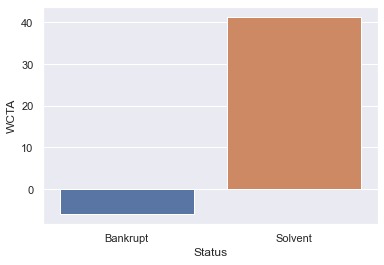

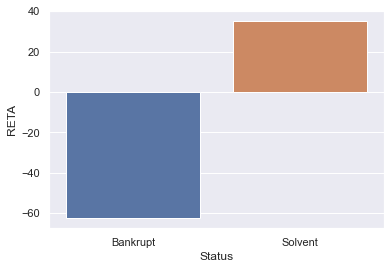

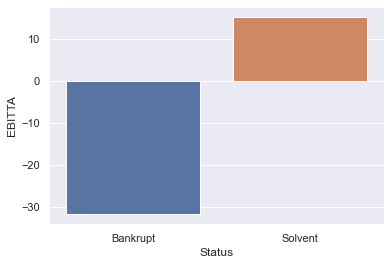

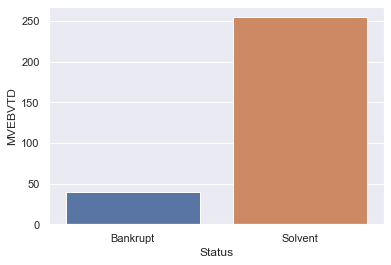

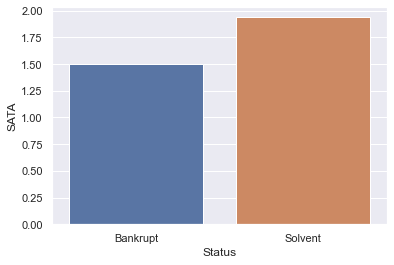

In [13]:
#Descriptive Profiling and Differentiation
Profile=pd.pivot_table(mydata,values=["WCTA","RETA","EBITTA","MVEBVTD","SATA"],index=["Status"])
Profile=pd.DataFrame(Profile)
Profile.head()
Profile["Status"]=["Bankrupt","Solvent"]
print(Profile)
sns.barplot(x=Profile.Status,y=Profile.WCTA)
plt.show()
sns.barplot(x=Profile.Status,y=Profile.RETA)
plt.show()
sns.barplot(x=Profile.Status,y=Profile.EBITTA)
plt.show()
sns.barplot(x=Profile.Status,y=Profile.MVEBVTD)
plt.show()
sns.barplot(x=Profile.Status,y=Profile.SATA)
plt.show()

In [14]:
#Building the Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
X_lda=lda.fit_transform(X,Y)
VarExplained=lda.explained_variance_ratio_
print(VarExplained)
Model=lda.fit(X,Y)

[1.]


In [15]:
#Model Attributes
Model.get_params(deep=True)

{'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [16]:
#Getting Fisher's LDA Model with Coefficients
Coef=Model.coef_
Coef=pd.DataFrame(Coef).transpose()
Coef.columns=["Fisher Z="]
Result=Coef.transpose()
Result.columns=["WCTA","RETA","EBITTA","MVEBVTD","SATA"]
print(Result)

               WCTA     RETA    EBITTA  MVEBVTD      SATA
Fisher Z=  0.015349  0.01828  0.041818   0.0077  1.254344


In [17]:
#Getting Scores for Classification
Scores=Model.decision_function(X)
Scores=pd.DataFrame(Scores)
Scores.columns=["ZScore"]
print(Scores)
Scores.to_csv("Zscores.csv",index=False)

      ZScore
0  -4.749900
1  -1.148397
2  -7.114795
3  -2.863518
4  -3.534630
..       ...
61  2.686624
62  2.319269
63  3.587997
64  0.521819
65  0.398335

[66 rows x 1 columns]


          0         1
0  0.991422  0.008578
1  0.759218  0.240782
2  0.999188  0.000812
3  0.946013  0.053987
4  0.971657  0.028343


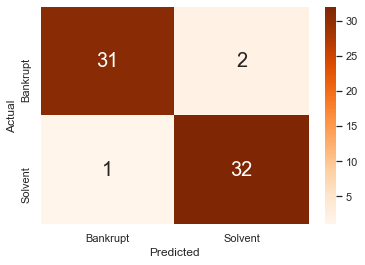

In [18]:
#Probability and Confusion Matrix
Posterior=Model.predict_proba(X)
Posterior=pd.DataFrame(Posterior)
print(Posterior.head())
pred_class=(Posterior[1]>0.5).astype(np.int) 
confusion=confusion_matrix(Y.astype(float),pred_class) 
sns.heatmap(confusion, annot=True,cmap="Oranges",annot_kws={"size":20},
           xticklabels=["Bankrupt","Solvent"],
           yticklabels=["Bankrupt","Solvent"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [19]:
#Getting Accuracy,Recall, and Precision
print("Accuracy=","{0:.4f}".format(accuracy_score(Y.astype(np.int),pred_class)))
print("Recall=","{0:.4f}".format(recall_score(Y.astype(np.int),pred_class)))
print("Precision=","{0:.4f}".format(precision_score(Y.astype(np.int),pred_class)))

Accuracy= 0.9545
Recall= 0.9697
Precision= 0.9412


           ZScore      WCTA      RETA    EBITTA   MVEBVTD      SATA
ZScore   1.000000  0.730281  0.870120  0.680870  0.735208  0.258934
WCTA     0.730281  1.000000  0.750183  0.236639  0.422045  0.336255
RETA     0.870120  0.750183  1.000000  0.640871  0.472480  0.046741
EBITTA   0.680870  0.236639  0.640871  1.000000  0.376509 -0.350012
MVEBVTD  0.735208  0.422045  0.472480  0.376509  1.000000  0.088242
SATA     0.258934  0.336255  0.046741 -0.350012  0.088242  1.000000


<AxesSubplot:>

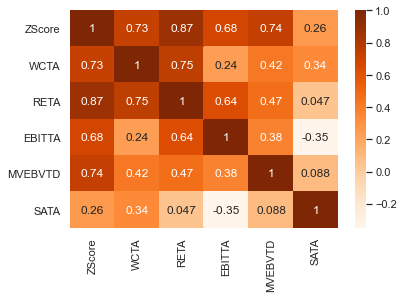

In [20]:
#Relative Importance of Predictor Variables
Data=[Scores.ZScore,mydata.WCTA,mydata.RETA,mydata.EBITTA,mydata.MVEBVTD,mydata.SATA]
Data=pd.DataFrame(Data).transpose()
CorMatrix=Data[Data.columns].corr()
print(CorMatrix)
CorMatrix=pd.DataFrame(CorMatrix)
CorMatrix
CorMatrix.to_csv("RelativeImportance.csv",index=False)
sns.heatmap(CorMatrix,annot=True,cmap="Oranges")

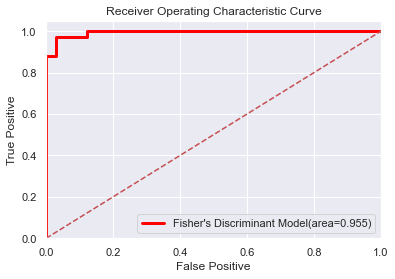

In [21]:
#Getting the ROC Curve
disroc=roc_auc_score(Y.astype(float),pred_class)
fpr,tpr,thresholds=roc_curve(Y.astype(float),Posterior[1])
plt.figure()
plt.plot(fpr,tpr,color="red",lw=3,label="Fisher's Discriminant Model(area=%0.3f)" %disroc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()